In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
from random import randint
from sklearn.datasets import make_blobs
from utility import *
from tqdm import tqdm

In [7]:
@jit(nopython=True)
def neighbors_clustering(sol, points, K):
    neighbors = []

    q = int(len(sol)/5)

    choices = np.arange(len(sol))

    orig_val = squared_inner_distance(sol, points, K)
    centroids = calc_centroids(sol, points, K)

    for i in range(q):
        choice = np.random.randint(len(choices))
        choices = np.delete(choices, choice)
        for k in range(K):
            new_sol = sol.copy()
            if(k != new_sol[choice]):
                new_sol[choice] = k
                new_val = orig_val - np.linalg.norm(points[choice]-centroids[sol[choice]]) + np.linalg.norm(points[choice]-centroids[k])
                neighbors.append((new_sol,new_val))


    choices1 = np.arange(len(sol))
    choices2 = np.arange(len(sol))
    for i in range(q):
        choice1 = np.random.randint(len(choices1))
        choices1 = np.delete(choices1, choice1)
        choice2 = np.random.randint(len(choices2))
        choices2 = np.delete(choices2, choice2)

        new_sol = sol.copy()
        new_sol[choice1], new_sol[choice2] = new_sol[choice2], new_sol[choice1]

        new_val = orig_val - np.linalg.norm(points[choice1]-centroids[sol[choice1]]) - np.linalg.norm(points[choice2]-centroids[sol[choice2]]) + np.linalg.norm(points[choice1]-centroids[sol[choice2]]) + np.linalg.norm(points[choice2]-centroids[sol[choice1]])
        neighbors.append((new_sol,new_val))
        
    return neighbors


@jit(nopython=True)
def local_search(base_sol, evaluate, find_neighbourhood, points, K):
    old_sol = base_sol
    base_val = evaluate(old_sol, points, K)
    iter = 1
    same_sol = 0

    while True:
        neighbourhood = find_neighbourhood(old_sol, points, K)
        best_val = evaluate(old_sol, points , K)
        best_sol = old_sol

        print("Iteration number:", iter, "Valore percentuale:", best_val/base_val*100, "%")

        for sol,val in neighbourhood:
            if(val < best_val):
                best_val = val
                best_sol = sol
        
        if(best_sol is old_sol):
            same_sol = same_sol + 1
            if(same_sol == 100):
                break
        else:
            same_sol = 0
            old_sol = best_sol

        iter = iter+1
    return old_sol

In [16]:

points, centroids = make_blobs(n_samples=500, centers=5, n_features=2, random_state=2)
#points = load_points('C:/Users/franc/Desktop/prova.txt')
K = 5
N = len(points)

sol = np.random.randint(K, size = N) #soluzione iniziale
#sol = create_initial_sol(points, K)

sol = local_search(sol, squared_inner_distance, neighbors_clustering, points, K)

print("{:.5E}".format(squared_inner_distance(sol, points, K)))

Iteration number: 1 Valore percentuale: 100.0 %
Iteration number: 2 Valore percentuale: 99.88037367961424 %
Iteration number: 3 Valore percentuale: 99.7656841832581 %
Iteration number: 4 Valore percentuale: 99.70012811223289 %
Iteration number: 5 Valore percentuale: 99.58083671581784 %
Iteration number: 6 Valore percentuale: 99.48202376665964 %
Iteration number: 7 Valore percentuale: 99.3645871456136 %
Iteration number: 8 Valore percentuale: 99.21673339187275 %
Iteration number: 9 Valore percentuale: 99.04408550979795 %
Iteration number: 10 Valore percentuale: 98.8944293459721 %
Iteration number: 11 Valore percentuale: 98.53554740197497 %
Iteration number: 12 Valore percentuale: 98.26168128898675 %
Iteration number: 13 Valore percentuale: 97.89123199525694 %
Iteration number: 14 Valore percentuale: 97.4009177754607 %
Iteration number: 15 Valore percentuale: 96.93791145390335 %
Iteration number: 16 Valore percentuale: 96.5604274743697 %
Iteration number: 17 Valore percentuale: 96.215786

In [18]:
print("{:.5E}".format(squared_inner_distance(sol, points, K)))

9.77242E+02


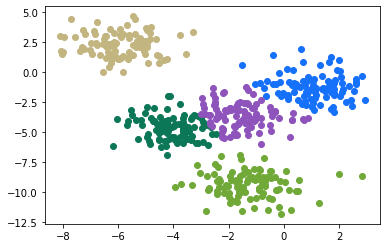

In [17]:
printR2sol(points, sol, K)

In [19]:
n_points = [500,1000,2000,5000,1400,10000,4000,7000,300,800]
n_clusters = [7,4,3,2,3,2,4,5,4,6,4]
dim_points = [32,3,2,2,3,2,3,2,64,32]

vals = []

for test in tqdm(range(1,11)):
    points = load_points(f'C:/Users/franc/Documents/GitHub/Ricerca_Operativa_2022/Ricerca_Operativa_2022/benchmark/benchmark{test}.txt')
    N = len(points)
    K = n_clusters[test-1]
    sol, centroids = k_means(points, K)
    vals.append(squared_inner_distance(sol, points, K))
    
    if(dim_points == 2):
        printR2sol(points, sol, K)

NameError: name 'tqdm' is not defined